<a href="https://colab.research.google.com/github/DanielDekhtyar/AI-Accelerator/blob/main/Module%208%20-%20Deep%20Learning/minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow import keras


1. טען את דאטסט MNIST (mnist.load_data())
2. בצע נורמליזציה לפיקסלים כך שיהיו בטווח 0-1
3. המר את התוויות לפורמט one-hot encoding
-  בעזרת  tf.keras.utils.to_categorical
4. בנה רשת נוירונים בעזרת Sequential, עם:
   - שכבת Flatten (28x28 שמתאימה לקלט)
   - שכבות dense לפי הצורך
   - שימו לב לשכבת יציאה מתאימה הן מבחינת מספר נויקונים והן מבחינת פונקציית אקטיבציה

5. קמפל את המודל עם פונקציית עלות ואופטימייזר מתאימים, גם צריך למדוד דיוק
6. אמן את המודל במשך 5 אפוקים
7. הצג את דיוק המודל על סט הבדיקה

In [2]:
# 1. טעינת הדאטסט
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


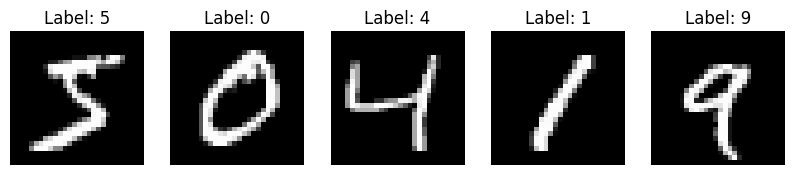

In [3]:
# הצגת 5 תמונות לדוגמה
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")
plt.show()

In [4]:
# 2. נורמליזציה של הנתונים
train_images = train_images/225
test_images = test_images/225

In [5]:
# 3. המרת התוויות ל-One-Hot Encoding
# עם tf.keras.utils.to_categorical
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [6]:
# 4. בניית המודל
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
# 5. קומפילציה ואימון
model.compile(loss = keras.losses.CategoricalCrossentropy(),
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy']
              )

In [8]:
history = model.fit(train_images, train_labels, epochs = 15, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8788 - loss: 0.4194 - val_accuracy: 0.9630 - val_loss: 0.1200
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9656 - loss: 0.1106 - val_accuracy: 0.9712 - val_loss: 0.0902
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9777 - loss: 0.0715 - val_accuracy: 0.9739 - val_loss: 0.0879
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9837 - loss: 0.0508 - val_accuracy: 0.9740 - val_loss: 0.0909
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9865 - loss: 0.0417 - val_accuracy: 0.9747 - val_loss: 0.0870
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0322 - val_accuracy: 0.9780 - val_loss: 0.0769
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9791 - val_loss: 0.0821
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9927 - loss: 0.0211

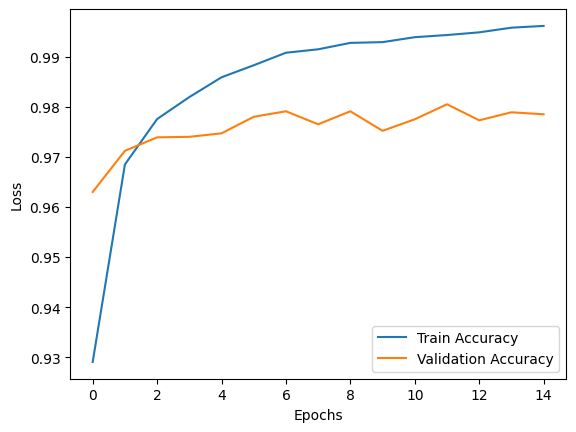

In [9]:
# 6. הערכת המודל על סט הבדיקה
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 64)                    │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 10)                    │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)